In [60]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [61]:
import numpy as np
import pandas as pd

In [62]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [63]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, extract, inspect 
from sqlalchemy import * 
import sqlalchemy as sa 

metadata = MetaData()

In [64]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [65]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [66]:
# We can view all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [67]:
# Save references to each table
measurement = Base.classes.measurement

station = Base.classes.station

In [68]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [69]:
#Viewing the data from the reference 
engine.execute('SELECT * FROM measurement LIMIT (10) ').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [70]:
engine.execute('SELECT * FROM station LIMIT (11)').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

# Exploratory Climate Analysis

In [71]:
#Using inspector to explore the database
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [72]:
#obtaining column names from measurement table
columns = inspector.get_columns('measurement')

for c in columns: 
    print(c["name"],c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [73]:
#obtaining column names from measurement table
columns = inspector.get_columns('station')

for c in columns: 
    print(c["name"],c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [74]:
#grabbing a count of total days 
session.query(func.count(measurement.date)).all()

[(19550)]

In [75]:
#printing the earliest date 
session.query(measurement.date).order_by(measurement.date).first()

('2010-01-01')

In [76]:
#printing the last date 
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23')

In [77]:
# Calculate the date 1 year ago from the last data point in the database
query_date = dt.date(2017,8,23) - dt.timedelta(days=365)

print(f"Date 1 year from the last date poitn: ",query_date)

Date 1 year from the last date poitn:  2016-08-23


In [78]:
# Perform a query to retrieve the data and precipitation scores
prcp_query = session.query(measurement.id,
                          measurement.station,
                          measurement.date,
                          measurement.prcp,
                          measurement.tobs).\
            filter(measurement.date >= query_date).\
            order_by(measurement.date).all()


In [79]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Data was already sorted with the order by satement in the previous cell 
df = pd.DataFrame(prcp_query)

df = df[['date','prcp']]

#fillna to fill NaN values with zero 
df = df.dropna()

df = df.set_index('date')

df

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


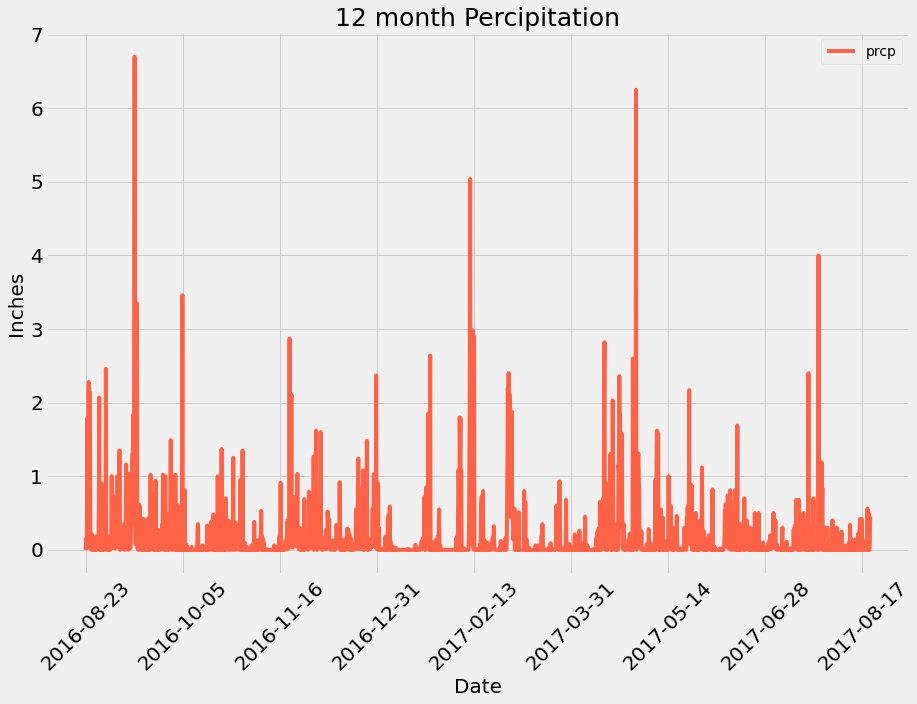

In [80]:
#Plot the results using the DataFrame plot method.
df.plot(sort_columns=True, fontsize=20,figsize=(13,10),rot=45,color='tomato',use_index=True)
plt.xlabel("Date",fontsize=20)
plt.ylabel("Inches",fontsize=20)
plt.title("12 month Percipitation",fontsize=25)
plt.tight_layout()
plt.show()

In [81]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()


,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [82]:
#obtaining column names from measurement table
columns = inspector.get_columns('station')

for c in columns: 
    print(c["name"],c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [83]:
columns = inspector.get_columns('measurement')

for c in columns: 
    print(c["name"],c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [84]:
# Design a query to show how many stations are available in this dataset?

total_stations = session.query(station).count()

print(f"There are {total_stations} total stations")

There are 9 total stations


In [85]:
measurement= Base.classes.measurement

station = Base.classes.station

In [86]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active_list = session.query(measurement.station, station.name, func.count(measurement.station)).\
            filter(measurement.station == station.station).group_by(measurement.station).\
                order_by(func.count(m.station).desc()).all()

most_active_list


[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

In [87]:
highest_observations = session.query(measurement.station, station.name, func.count(measurement.tobs)).\
            filter(measurement.station == station.station).group_by(measurement.station).\
            order_by(func.count(measurement.tobs).desc()).all()

highest_observations

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

In [88]:
active_station = most_active_list[0][1]
station_records = most_active_list[0][2]

print(f"Most active station: {active_station}")
print(f"Total Records: {station_records}")

Most active station: WAIHEE 837.5, HI US
Total Records: 2772


In [89]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

temp_list = [] 

temp_list = session.query(func.max(measurement.tobs),func.min(measurement.tobs),func.avg(measurement.tobs)).\
            filter(m.station == "USC00519281").group_by(measurement.station).\
                  order_by(func.max(measurement.tobs).desc()).all()


max_temp = temp_list[0][0]

min_temp = temp_list[0][1]

avg_temp = temp_list[0][2]


print(f"Stations Max Temp: {max_temp}")

print(f"Stations Min Temp: {min_temp}")

print(f"Stations Avg Temp: {round(avg_temp,1)}")





Stations Max Temp: 85.0
Stations Min Temp: 54.0
Stations Avg Temp: 71.7


In [90]:
# Choose the station with the highest number of temperature observations.



temp_query = session.query(measurement.station,
                          measurement.date, 
                          measurement.tobs).\
            filter(measurement.date >= query_date).\
            filter(measurement.station == "USC00519281").\
            order_by(measurement.date).all()



In [91]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Data was already sorted with the order by satement in the previous cell 
df2 = pd.DataFrame(temp_query)

df2 = df2[['date','tobs']]

#fillna to fill NaN values with zero 
df2 = df2.dropna()


df2

,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0
...,...,...
347,2017-08-14,77.0
348,2017-08-15,77.0
349,2017-08-16,76.0
350,2017-08-17,76.0


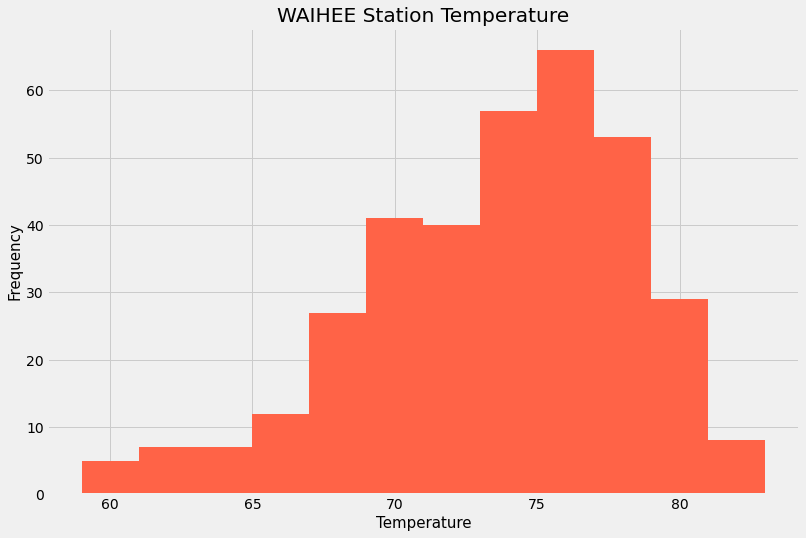

In [92]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
plt.figure(figsize=(12,8))

plt.hist(df2['tobs'], color='tomato',bins=12)
plt.xlabel('Temperature',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('WAIHEE Station Temperature')
plt.show()



## Bonus Challenge Assignment

In [93]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [94]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_data = calc_temps('2017-07-02', '2017-07-08')
trip_data

[(71.0, 78.11904761904762, 87.0)]

In [99]:
#Prompting user to input their start and end dates for their trip 
start_date = input("Enter the trip start date in 'YYYY-MM-DD' format: ")
end_date = input("Enter the trip end date in 'YYYY-MM-DD' format: ")


Enter the trip start date in 'YYYY-MM-DD' format:  2017-07-02
Enter the trip end date in 'YYYY-MM-DD' format:  2017-07-08


In [100]:
#Calculating the previous year's dates based on the input dates from the user
date_format = dt.date.today()

start_date_dateformat = date_format.replace(year=int(Trip_start_date[:4]),month=int(start_date[5:7]),day=int(start_date[8:]))

Previous_start_date = start_date_dateformat - dt.timedelta(days=365)

Previous_start_date = Previous_start_date.strftime("%Y-%m-%d")



end_date_dateformat = date_format.replace(year=int(end_date[:4]),month=int(end_date[5:7]),day=int(end_date[8:]))

Previous_end_date = end_date_dateformat - dt.timedelta(days=365)

Previous_end_date = Previous_end_date.strftime("%Y-%m-%d")


In [101]:
trip_data = calc_temps(Previous_start_date, Previous_end_date)
trip_data

[(71.0, 76.92857142857143, 82.0)]

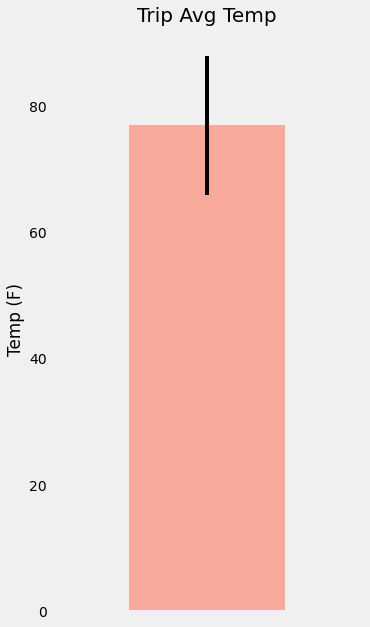

In [102]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
trip_df = pd.DataFrame(trip_data, columns=['Min Temp', 'Avg Temp', 'Max Temp'])
avg_temp = trip_df['Avg Temp']
min_max_temp = trip_df.iloc[0]['Max Temp'] - trip_df.iloc[0]['Min Temp']
avg_temp.plot(kind='bar', yerr=min_max_temp, figsize=(5,10), alpha=0.5, color='tomato')
plt.title("Trip Avg Temp", fontsize=20)
plt.ylabel("Temp (F)")
plt.xticks([])
plt.grid()
plt.show()

In [111]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.

Results = session.query(measurement.station, func.sum(measurement.prcp))\
                       .filter(measurement.date>=Previous_start_date).filter(measurement.date<=Previous_end_date)\
                       .group_by(measurement.station).order_by(func.sum(measurement.prcp).desc()).all()  
print("Station Id\tTotal Rainfall")

for each in Results: print(each[0],"\t",each[1])    

Station Id	Total Rainfall
USC00516128 	 3.14
USC00519281 	 1.48
USC00513117 	 0.76
USC00519523 	 0.45000000000000007
USC00514830 	 0.44
USC00519397 	 0.09
USC00517948 	 None


In [113]:
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
sel = [measurement.station,station.name,func.sum(measurement.prcp),station.latitude,station.longitude,station.elevation]
Results = session.query(*sel).filter(measurement.station==station.station)\
                       .filter(measurement.date>=Previous_start_date).filter(measurement.date<=Previous_end_date)\
                       .group_by(measurement.station).order_by(func.sum(measurement.prcp).desc()).all()

# print("Station\t\tStation_Name\t\tRainfall\tLatitude\tLongitude\tTemperature")
# for result in Results: print(result[0],"\t",result[1],"\t",result[2],"\t\t",result[3],"\t",result[4],"\t",result[5])

for result in Results: print(result)




('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 3.14, 21.3331, -157.8025, 152.4)
('USC00519281', 'WAIHEE 837.5, HI US', 1.48, 21.45167, -157.84888999999998, 32.9)
('USC00513117', 'KANEOHE 838.1, HI US', 0.76, 21.4234, -157.8015, 14.6)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 0.45000000000000007, 21.33556, -157.71139, 19.5)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 0.44, 21.5213, -157.8374, 7.0)
('USC00519397', 'WAIKIKI 717.2, HI US', 0.09, 21.2716, -157.8168, 3.0)
('USC00517948', 'PEARL CITY, HI US', None, 21.3934, -157.9751, 11.9)


In [104]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
